# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
df_instacart = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_order_p = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
df_instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
df_order_p.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

-Casi la totalidad de los datos de los DataFrame son de tipo entero.

-En los DataFrame que contienen mas entradas existen valores nulos o vacios.

-Como es un análisis prelimanar hay que verificar el formato que tienen las columnas que hacen referencia a la fecha y a la hora.



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

-Primero mostraria los datos ya sea con head, teal o sample para ver como estan dispuestos los datos en cada DataFrame.

-Comprobar duplicados

-comprobar datos nulos o vacios

-eliminar duplicados

-eliminar datos vacios o reemplazar segun sea el caso 



## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
#print(df_instacart.head())
print(df_instacart.duplicated().sum())


15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos_miercoles_2am =df_instacart.loc[(df_instacart.loc[:,'order_dow'] == 3) & (df_instacart.loc[:,'order_hour_of_day'] == 2) ]

print( pedidos_miercoles_2am )
print()
print( pedidos_miercoles_2am.duplicated().sum() )

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

In [10]:
# Elimina los pedidos duplicados
df_instacart = df_instacart.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_instacart.duplicated().sum())
df_instacart.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_instacart['order_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

-Existian 15 registros duplicados en el DataFrame en particular todos eran del Miercoles a las 2 am, luego de verificar la existencia de duplicados se prosiguio a la eliminarlos al hacerlo se reinicianor los index del DataFrame para mayor consistencia

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().sum())

0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print(df_products['product_id'].duplicated().sum())

0


In [4]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.upper()

print(df_products['product_name'].duplicated().sum())

print(df_products['product_name'].isna().sum())

1361
1258


In [5]:
# Revisa si hay nombres duplicados de productos no faltantes
productos_no_faltantes = df_products[~(df_products['product_name'].isna())]
print(productos_no_faltantes)
productos_sin_duplicados = productos_no_faltantes.drop_duplicates(subset='product_name').reset_index(drop=True)
print(productos_sin_duplicados)
df_products = productos_sin_duplicados

#verificar si todavia existen nombres de productos duplicados
print(df_products['product_name'].duplicated().sum())




       product_id                                       product_name  \
0               1                         CHOCOLATE SANDWICH COOKIES   
1               2                                   ALL-SEASONS SALT   
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   
4               5                          GREEN CHILE ANYTIME SAUCE   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

Describe brevemente tus hallazgos y lo que hiciste con ellos.

-No existian filas totalmente duplicadas, tampoco habian IDs duplicados pero si nombres de productos luego de saber esto se prosiguio a eleminar estos duplicados y a verifcar nuevamente.

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().sum())

0


In [19]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_departments['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

-No existen duplicados para el DataFrame

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [21]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_aisles['aisle_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

-No existen duplicados para el DataFrame

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print(df_order_p.duplicated().sum())

0


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

duplicado_order_id = df_order_p[df_order_p['order_id'].duplicated()]
print(duplicado_order_id.head())
#print(df_order_p['product_id'].duplicated().sum())
#print(df_order_p[df_order_p['add_to_cart_order'].duplicated()].head())
#print(df_order_p['reordered'].duplicated().sum())
print(df_order_p[df_order_p['order_id']==2867619])
print()
print(df_order_p[df_order_p['order_id']==2867619].duplicated().sum())

      order_id  product_id  add_to_cart_order  reordered
367    2867619       48094                9.0          0
824     844425       39408               10.0          1
1124   3319857       37067               19.0          0
1258   1038788       12471               14.0          0
1303   2825714       44632               16.0          1
         order_id  product_id  add_to_cart_order  reordered
209       2867619       21616               13.0          0
367       2867619       48094                9.0          0
588554    2867619       10199                8.0          1
597172    2867619       46900               22.0          0
1581682   2867619       40078                7.0          1
1790435   2867619       34190               10.0          0
1905810   2867619       45788               18.0          0
1910919   2867619       34786               15.0          0
1916515   2867619       43662               24.0          0
2160728   2867619       27093               23.0          

Describe brevemente tus hallazgos y lo que hiciste con ellos.

-El DataFrame no tiene filas copletas iguales pero evidentemente tiene duplicados en sus otras columnas ya que esta tiene lo articulos pedidos en un pedido como ejemplo  duplicado_order_id contiene las entradas duplicadas que estan en order_id y al buscar alguna de estas entradas se puede ver que no tiene duplicadas las filas. 
-No se puede eleminar los duplicados en este caso ya que esto eliminaria una cantidad sustancial de información 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products.isna().sum())
print()
print(df_products['product_name'].isna().sum())
print()
print(df_products[df_products['product_name'].isna()])

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

0

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.
-En la columna product_name hay un valor nulo es igual a NaN

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_products[df_products['aisle_id'] == 100])


    product_id product_name  aisle_id  department_id
37          38          NaN       100             21


Describe brevemente cuáles son tus hallazgos.
-Como se puede ver en el registro con el id 100 de pasillo contiene el valor nulo en la columna product_name

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_products[df_products['department_id'] == 21])

    product_id product_name  aisle_id  department_id
37          38          NaN       100             21


Describe brevemente cuáles son tus hallazgos.-Como se puede ver en el registro con el id 21 de departamento contiene el valor nulo en la columna product_name

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_departments[df_departments['department_id'] == 21])
print()
print(df_aisles[df_aisles['aisle_id'] == 100])


    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.-En el DataFrame tanto de departments como aisles cuentan con un valor nulo en los id previamente mencionados con el valor missing

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print(df_products.isna().sum())
print()
print(df_products[df_products['aisle_id'] == 100])

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

    product_id product_name  aisle_id  department_id
37          38      Unknown       100             21


Describe brevemente tus hallazgos y lo que hiciste con ellos.

-Se busco valores nulos en el DataFrame df_products en lo cual se encontro 1 registro

-Se verifco que el valor nulo pertenecia a la calumna product_name 

-Se busco los registros con id similar en la columna department_id e aisle_id y el valor nulo solo pertenecia a estos registros

-Finalmente se reemplazo en el valor nulo con una cadena recomendado en este caso 'Unknown' y se prosiguio a verificar nuevamente los valores nulos siendo estos -0

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Desarrollaste de manera excelente el análisis de valores faltantes y los llenaste con "unknown".
    
</div>

### `orders` data frame

In [29]:
# Encuentra los valores ausentes
print(df_instacart.isna().sum())
print()


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64



In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_instacart_nan = df_instacart[df_instacart['days_since_prior_order'].isna()]
print(df_instacart_nan[df_instacart_nan['order_number'] != 1])
print()
days_fill = df_instacart['days_since_prior_order'].median()
df_instacart['days_since_prior_order'] = df_instacart['days_since_prior_order'].fillna(days_fill)
print(df_instacart.isna().sum())

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
-Se encontraron valores ausentes en la columna days_since_prior_order 

-Se comprobo que los valores ausentes son de solo la primera orden de los clientes

-Se prosiguio a rellenar los datos nulos con la mediana de days_since_prior_order esto ya que al tener un rango de valores de 1 a hata 30 una media no seria muy significativa. Tambien hay que considerar que los datos faltantes son solo un 6% de la tabla lo cual no influenciara mucho en un análisis posterior.

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
print(df_order_p.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_order_p['add_to_cart_order'].max())
print(df_order_p['add_to_cart_order'].min())

64.0
1.0


Describe brevemente cuáles son tus hallazgos.-El valor minimo para la columna add_to_cart_order es 1 y el valor maximo 64

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
df_order_nan = df_order_p[df_order_p['add_to_cart_order'].isna()]
print(df_order_nan)


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
group_order = df_order_nan.groupby(by='order_id')['product_id'].count()
print(group_order.head())
print((group_order > 64).sum())
print(group_order.min())



order_id
9310       1
61355     63
102236    31
129627     5
165801     6
Name: product_id, dtype: int64
0
1


Describe brevemente cuáles son tus hallazgos.-Habian 836 datos nulos en la columna add_to_cart_order al analizarlo el minimo de pedidos por producto fue de 1 y el maximo de 63 

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_p['add_to_cart_order'] = df_order_p['add_to_cart_order'].fillna(999)
print(df_order_p.isna().sum())
df_order_p['add_to_cart_order'] = df_order_p['add_to_cart_order'].astype(int)
df_order_p.info()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

-Se buscaron los datos nulos en DataFrame df_order_p el cual contenia datos nulos en la columna add_to_cart_order

-Se analizo los pedidos en un nuevo DataFrame df_order_nan que contenia los datos nulos y luego se agrupo en el DataFrame group_order para ver la cantidad de pedido por producto

-Para finalizar se remplazaron los valores ausentes y se convertio el tipo de dato de la columna a entero ya que antes era de tipo float

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

-Habian mas datos nulos que duplicados 

-A modo general los datos nulos y datos duplicados no constituian un porcentaje significativo para ser estos decisivos al momento de realizar un análisis

-Todos los DataFrame o set de datos son coherentes en su estructura me refiero a que todos estan bien relacionados para poder realizar un análisis con estos

-Los tipos de datos de cada columna de todo los DataFrame en general estaban con su tipo correcto en cuanto a la situación la unica excepción fue la columna add_to_cart_order ya que esta al ser un número que hacer referencia a una posición no tiene sentido que sea tipo float.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [78]:
df_filter_hour = df_instacart[(df_instacart['order_hour_of_day'] >= 0) & (df_instacart['order_hour_of_day'] <= 23)]
print("cantidad de filas en el filtro de hora es" , len(df_filter_hour))
print("cantidad de filas en el DataFrame es",len(df_instacart))

print(df_instacart['order_hour_of_day'].value_counts().sort_index())
print(df_instacart['order_hour_of_day'].value_counts().sort_index().sum())

cantidad de filas en el filtro de hora es 478952
cantidad de filas en el DataFrame es 478952
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64
478952


In [79]:
df_filter_dow = df_filter_hour[(df_filter_hour['order_dow'] >= 0) & (df_filter_hour['order_dow'] <= 6) ]
print("cantidad de filas en el filtro de dia es", len(df_filter_dow))
print("cantidad de filas en el DataFrame es",len(df_instacart))

print(df_instacart['order_dow'].value_counts().sort_index())
print(df_instacart['order_dow'].value_counts().sort_index().sum())

cantidad de filas en el filtro de dia es 478952
cantidad de filas en el DataFrame es 478952
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64
478952


Escribe aquí tus conclusiones
-Se hizo un filtro con los valores dados y el resultado fue en el caso de ambos la totalidad de las entradas por lo que no hay datos fuera de los rangos establecidos

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64


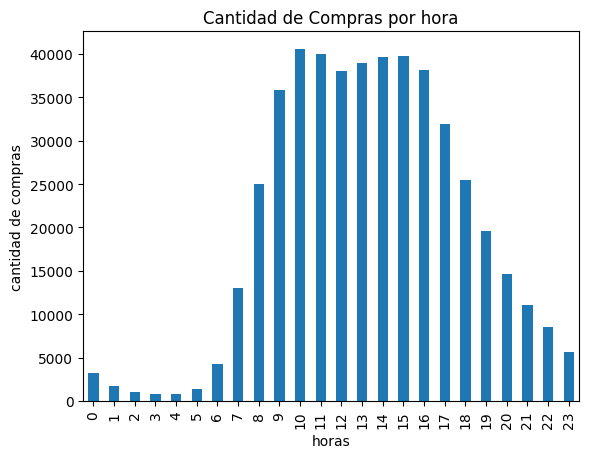

In [40]:
df_grafico1 = df_filter_hour['order_hour_of_day'].value_counts().sort_index()

df_grafico1.plot(title='Cantidad de Compras por hora', 
                 kind='bar', 
                 x=df_grafico1.index, 
                 y=df_grafico1.values, 
                 xlabel='horas', 
                 ylabel='cantidad de compras')
print(df_instacart.groupby(by='order_hour_of_day')['order_id'].count())
plt.show()

Escribe aquí tus conclusiones

-En general se realizan una gran cantidad de compras entre las 9 y las 17 horas.

-Tenemos 2 grupos con respecto a la hora que son bajas las compras en la mañana y en la tarde noche. En la mañana entre las 0 y 8 horas hay un menor cantidad de pedidos ya en esta ultima comenzando a aumentar y en la tarde noche a partir de las 18 horas la cantidad de pedidos empieza a diminuir hasta las 23.

-Se puede concluir que el rango de hora en el cual se realizan mas pedidos es en comparacion al horario laboral (periodo de 8 horas) ya que es donde las personas estan mas activas y los rangos de hora en la mañana y en la tarde noche son menos activos ya que estan descansando y van a descansar.

### [A3] ¿Qué día de la semana compran víveres las personas?

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


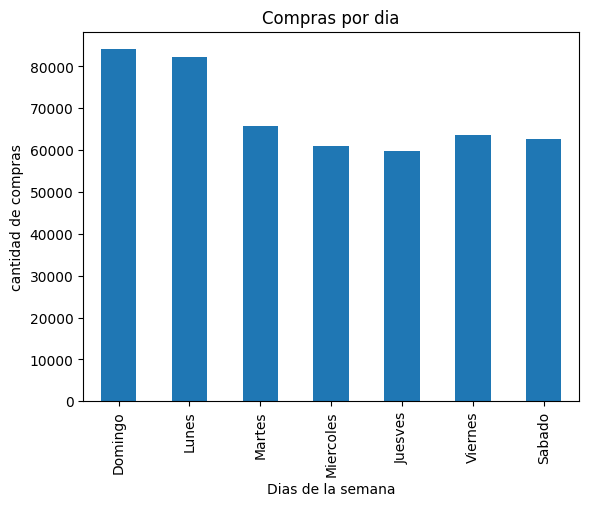

In [41]:
df_grafico2 = df_filter_dow['order_dow'].value_counts().sort_index()
colx = ['Domingo','Lunes','Martes', 'Miercoles', 'Juesves', 'Viernes', 'Sabado']
df_grafico2.plot(title='Compras por dia', 
                 kind='bar', 
                 x=df_grafico2.index, 
                 y=df_grafico2.values, 
                 xlabel='Dias de la semana', 
                 ylabel='cantidad de compras')
plt.xticks(ticks=df_grafico2.index, labels=colx)
print(df_grafico2)
plt.show()

Escribe aquí tus conclusiones

-Los días Domingos como lunes son lo días en lo que se realizan mas compras dismuyendo mientras avanza la semana y aumenta mientras se acerca el fin de semana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

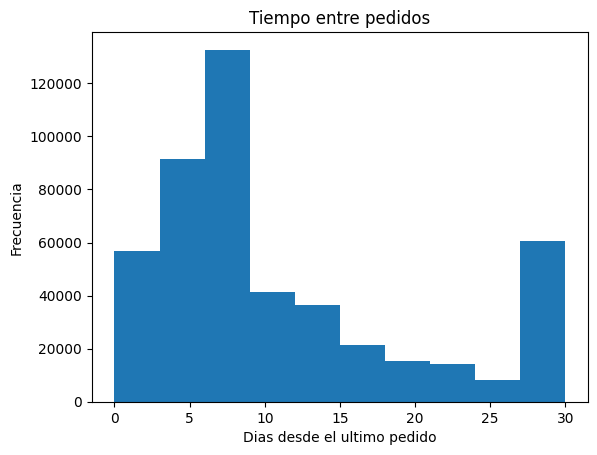

count    478952.000000
mean         10.855021
std           8.962483
min           0.000000
25%           5.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


In [42]:
#df_grafico3 = df_instacart['days_since_prior_order'].value_counts().sort_index()
#df_grafico3.plot(title='Tiempo de espera para otro pedido',kind='bar', 
#                 x=df_grafico3.index, 
#                y=df_grafico3.values, xlabel='Días tras la ultima compra', ylabel='cantidad de personas')
df_instacart['days_since_prior_order'].plot(kind='hist')
plt.title('Tiempo entre pedidos')
plt.xlabel('Dias desde el ultimo pedido')
plt.ylabel('Frecuencia')
plt.show()
print(df_instacart['days_since_prior_order'].describe())


Escribe aquí tus conclusiones

-En promedio se demoran 10 días en comprar nuevamente siendo 0 días el minimo de días que se demora en comprar nuevamente y 30 el maximo.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64


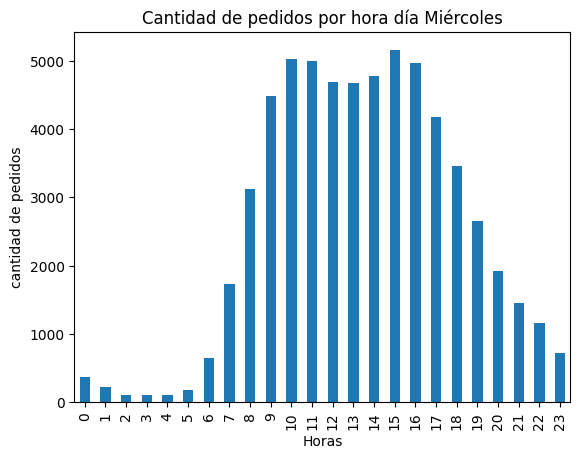

In [43]:
df_miercoles = df_instacart[df_instacart['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
print(df_miercoles)
#df_instacart[df_instacart['order_dow'] == 3]['order_hour_of_day'].plot(kind='hist', bins=30)
#df_instacart[df_instacart['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist', bins=30)
df_miercoles.plot(title='Cantidad de pedidos por hora día Miércoles', 
                  kind='bar', 
                  x=df_miercoles.index, 
                  y=df_miercoles.values, 
                  xlabel='Horas', 
                  ylabel='cantidad de pedidos')
plt.show()

0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64


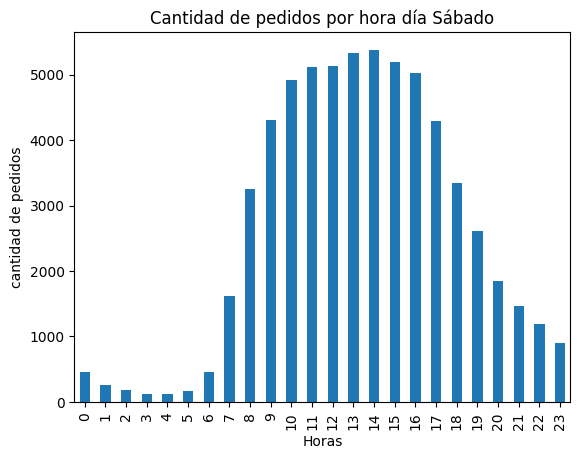

In [44]:
df_sabado = df_instacart[df_instacart['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()
print(df_sabado)
df_sabado.plot(title='Cantidad de pedidos por hora día Sábado', 
               kind='bar', 
               x=df_sabado.index, 
               y=df_sabado.values, 
               xlabel='Horas', 
               ylabel='cantidad de pedidos')


plt.show()


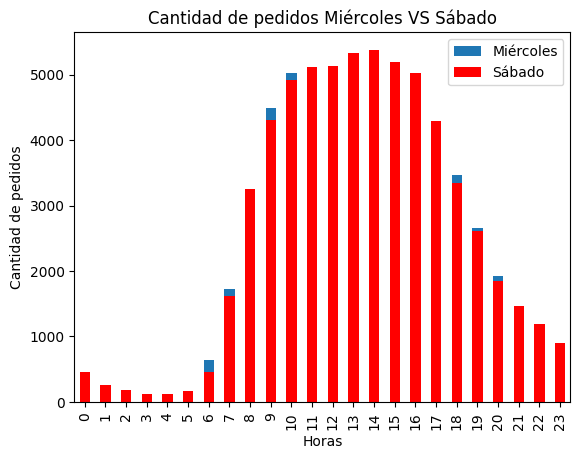

In [44]:
df_miercoles.plot(kind='bar', x=df_miercoles.index, y=df_miercoles.values)
df_sabado.plot(kind='bar', x=df_sabado.index, y=df_sabado.values,color='red')
plt.title('Cantidad de pedidos Miércoles VS Sábado')
plt.xlabel('Horas')
plt.ylabel('Cantidad de pedidos')
plt.legend(['Miércoles','Sábado'])

plt.show()


Escribe aquí tus conclusiones

-Como se puede apreciar en la distribución y en los gráficos los 2 días tienen casi la misma distribuición pero el Miécoles tiene una ligera ventaja en las horas 6, 7, 9, 18, 19 y 20.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [45]:
#Pedidos que hizo cada cliente
filter_clientes = df_instacart['user_id'].value_counts()
#cantidad de clientes que hicieron un pedido
conteo_cant_compras =  filter_clientes.value_counts().sort_index()
orden_conteo = conteo_cant_compras.reset_index()
orden_conteo.columns = ['n pedidos','cantidad_clientes']
#print(conteo_cant_compras)
print(filter_clientes.head())
print(orden_conteo)
orden_conteo.describe()


149605    28
193164    26
78375     25
148162    24
66664     24
Name: user_id, dtype: int64
    n pedidos  cantidad_clientes
0           1              55357
1           2              36508
2           3              21547
3           4              13498
4           5               8777
5           6               6012
6           7               4240
7           8               3019
8           9               2152
9          10               1645
10         11               1308
11         12                947
12         13                703
13         14                512
14         15                437
15         16                263
16         17                184
17         18                121
18         19                 85
19         20                 52
20         21                 22
21         22                 23
22         23                 19
23         24                  3
24         25                  1
25         26                  1
26         28   

,n pedidos,cantidad_clientes
count,27.000000,27.000000
mean,14.037037,5831.000000
std,8.002314,12825.723129
min,1.000000,1.000000
25%,7.500000,37.500000
50%,14.000000,512.000000
75%,20.500000,3629.500000
max,28.000000,55357.000000


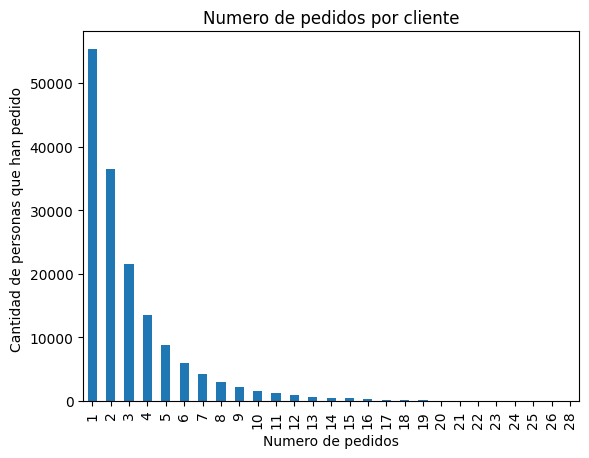

In [46]:
orden_conteo.plot(title='Numero de pedidos por cliente', 
                  kind='bar', 
                  x='n pedidos', 
                  y='cantidad_clientes', 
                  xlabel='Numero de pedidos', 
                  ylabel='Cantidad de personas que han pedido ', 
                  legend=False)
plt.show()

Escribe aquí tus conclusiones

-En promedio se hacen 14 pedidos.

-La gran mayoria de personas solo hacen 1 pedido, como se puede apreciar entre mas pedidos se hacen menos personas los hacen con esto me refiero a que las personas que hacen 28 pedidos que es el maximo es solo una mientras que las personar que hacen solo 1 pedido son 55357


### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
#agrupar por product_id y contar las ordenes de estos
df_cant_product = df_order_p.groupby(by='product_id')['order_id'].count().reset_index()
df_cant_product.columns = ['product_id','order_count']

#merge con df_products para tener el nombre de los productos
prducto_conteo =pd.merge(df_cant_product,df_products,on='product_id')

prducto_conteo = prducto_conteo.sort_values(by='order_count',ascending=False).head(20)
#oduct_id product_name order_count
print(prducto_conteo[['product_id','product_name','order_count']])


       product_id              product_name  order_count
22310       24852                    BANANA        66050
11767       13176    BAG OF ORGANIC BANANAS        53297
18953       21137      ORGANIC STRAWBERRIES        37039
19643       21903      ORGANIC BABY SPINACH        33971
42277       47209      ORGANIC HASS AVOCADO        29773
42778       47766           ORGANIC AVOCADO        24689
42654       47626               LARGE LEMON        21495
15029       16797              STRAWBERRIES        20018
23522       26209                     LIMES        19690
24995       27845        ORGANIC WHOLE MILK        19600
25102       27966       ORGANIC RASPBERRIES        19197
20572       22935      ORGANIC YELLOW ONION        15898
22409       24964            ORGANIC GARLIC        15292
40301       45007          ORGANIC ZUCCHINI        14584
35196       39275       ORGANIC BLUEBERRIES        13879
44510       49683            CUCUMBER KIRBY        13675
25318       28204        ORGANI

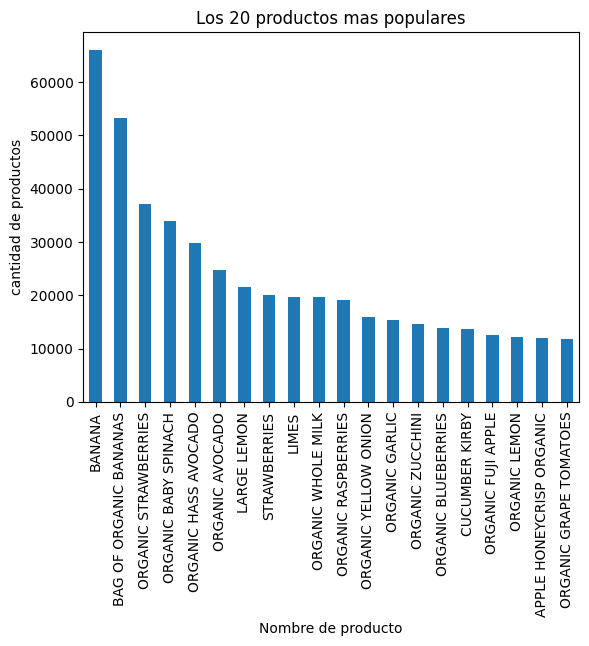

In [131]:
prducto_conteo.plot(title='Los 20 productos mas populares', kind='bar', 
                    x='product_name', 
                    y='order_count', 
                    xlabel='Nombre de producto', 
                    ylabel='cantidad de productos', 
                    legend=False )
plt.show()

Escribe aquí tus conclusiones

-El producto mas popular fueron las bananas

-En general los productos mas vendidos son productos organicos.


# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [48]:
#cantidad articulos de un cliente en una orden
cantidad_articulos_pedido = df_order_p.groupby(by='order_id')['product_id'].count()
#cuentas personas tienen una cantidad de articulos en una orden
conteo_cantidad_articulos_pedido = cantidad_articulos_pedido.value_counts()
print(cantidad_articulos_pedido.idxmax())
print(conteo_cantidad_articulos_pedido.head())
print(df_order_p[df_order_p['order_id'] ==61355])

61355
5    31923
6    31698
4    31054
7    30822
3    29046
Name: product_id, dtype: int64
         order_id  product_id  add_to_cart_order  reordered
57981       61355        5322                999          0
149404      61355       39475                 45          0
247893      61355        8594                999          0
269840      61355       14233                  5          0
345399      61355       24010                 51          0
...           ...         ...                ...        ...
4426514     61355       29270                 15          0
4482168     61355       24964                 33          0
4515077     61355        6760                 27          0
4521208     61355       16262                 62          0
4525165     61355       24561                 54          0

[127 rows x 4 columns]


In [49]:
#el print para el primer describe es solo para ver los 2 ya que sin el print solo sale el output del ultimo
print(cantidad_articulos_pedido.describe())
conteo_cantidad_articulos_pedido.describe()


count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


count       90.000000
mean      5000.511111
std       9282.034169
min          1.000000
25%          5.250000
50%        138.000000
75%       4276.000000
max      31923.000000
Name: product_id, dtype: float64

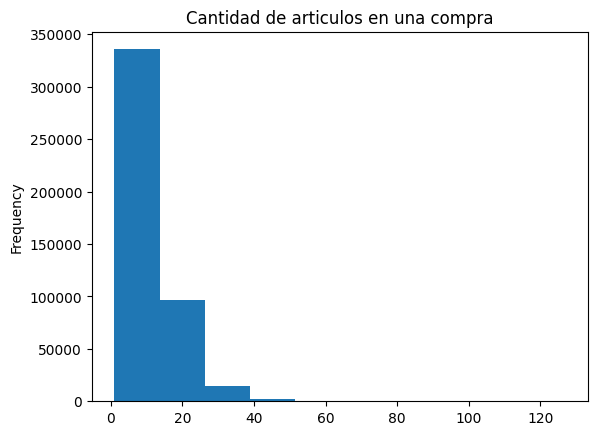

In [50]:
cantidad_articulos_pedido.plot(title='Cantidad de articulos en una compra' , 
                               kind='hist', 
                               xlabel='cantidad de articulos en un pedido', 
                               ylabel='Frecuencia')
plt.show()

Escribe aquí tus conclusiones

-Como se puede ver la gran mayoria de personas compra en promedio 10 articulos en un pedido

-El minimo de articulos encargados en un pedido es 1 y el maximo de 127

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [51]:
#dataframe que tiene solo los productos que se volvieron a pedir
#productos_recompra = df_order_p[df_order_p['reordered'] == 1]
#conteo de cada producto que se volvio a pedir
#conteo_recompra = productos_recompra.groupby(by='product_id')['reordered'].count().reset_index()
#conteo_recompra.columns = ['product_id','reordered_count']

#df_recompra_products_merge = pd.merge(conteo_recompra,df_products, on='product_id')
#print(df_recompra_products_merge)

conteo_reordered = df_order_p.groupby('product_id').agg(total_product=('product_id','count'), 
                                                        reordered_count=('reordered','sum'))
print(conteo_reordered)



            total_product  reordered_count
product_id                                
1                     280              158
2                      11                0
3                      42               31
4                      49               25
7                       2                1
...                   ...              ...
49690                   5                4
49691                  72               31
49692                  12                5
49693                  25               11
49694                   9                3

[45573 rows x 2 columns]


In [52]:
#filter_recompra_merge = df_recompra_products_merge.sort_values(by='reordered_count',ascending=False).head(20)
#print(filter_recompra_merge[['product_id','reordered_count','product_name']])
product_reorder_merge = pd.merge(df_products[['product_id','product_name']],conteo_reordered, on='product_id')

print(product_reorder_merge)

       product_id                                       product_name  \
0               1                         CHOCOLATE SANDWICH COOKIES   
1               2                                   ALL-SEASONS SALT   
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   
4               7                     PURE COCONUT WATER WITH ORANGE   
...           ...                                                ...   
44511       49684          VODKA- TRIPLE DISTILLED- TWIST OF VANILLA   
44512       49685                 EN CROUTE ROAST HAZELNUT CRANBERRY   
44513       49686                                   ARTISAN BAGUETTE   
44514       49687         SMARTBLEND HEALTHY METABOLISM DRY CAT FOOD   
44515       49688                             FRESH FOAMING CLEANSER   

       total_product  reordered_count  
0                280              158  
1                 11                0  
2              

In [53]:
productos_principales = product_reorder_merge.sort_values('reordered_count',ascending=False).head(20)
print(productos_principales)

       product_id              product_name  total_product  reordered_count
22310       24852                    BANANA          66050            55763
11767       13176    BAG OF ORGANIC BANANAS          53297            44450
18953       21137      ORGANIC STRAWBERRIES          37039            28639
19643       21903      ORGANIC BABY SPINACH          33971            26233
42277       47209      ORGANIC HASS AVOCADO          29773            23629
42778       47766           ORGANIC AVOCADO          24689            18743
24995       27845        ORGANIC WHOLE MILK          19600            16251
42654       47626               LARGE LEMON          21495            15044
25102       27966       ORGANIC RASPBERRIES          19197            14748
15029       16797              STRAWBERRIES          20018            13945
23522       26209                     LIMES          19690            13327
20572       22935      ORGANIC YELLOW ONION          15898            11145
22409       

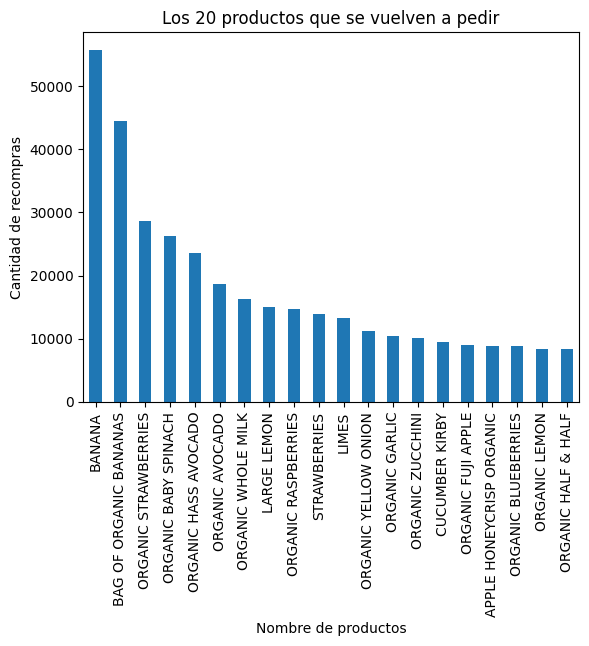

In [54]:
productos_principales.plot(title='Los 20 productos que se vuelven a pedir', kind='bar', 
                          x='product_name', 
                          y='reordered_count', 
                          xlabel='Nombre de productos', 
                          ylabel='Cantidad de recompras', 
                           legend=False)
plt.show()

Escribe aquí tus conclusiones

-La mayor cantidad de recompras la tiene las bananas

-En general los productos que se vuelven a comprar son frutas y verduras organicas

-Lo menor pedido es organic half & half



### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [55]:

product_yes_no_reordered = df_order_p.groupby('product_id').agg(
    total_orders=('product_id', 'count'),
    reordered_count=('reordered', 'sum')
).reset_index()

product_yes_no_reordered['ordered_only'] = product_yes_no_reordered['total_orders'] - product_yes_no_reordered['reordered_count']
product_yes_no_reordered['reorder_proportion'] = product_yes_no_reordered['reordered_count'] / product_yes_no_reordered['total_orders']
product_yes_no_reordered['order_only_proportion'] = product_yes_no_reordered['ordered_only'] / product_yes_no_reordered['total_orders']
print(product_yes_no_reordered)

print(product_yes_no_reordered[product_yes_no_reordered['reordered_count'] == 55763])

       product_id  total_orders  reordered_count  ordered_only  \
0               1           280              158           122   
1               2            11                0            11   
2               3            42               31            11   
3               4            49               25            24   
4               7             2                1             1   
...           ...           ...              ...           ...   
45568       49690             5                4             1   
45569       49691            72               31            41   
45570       49692            12                5             7   
45571       49693            25               11            14   
45572       49694             9                3             6   

       reorder_proportion  order_only_proportion  
0                0.564286               0.435714  
1                0.000000               1.000000  
2                0.738095               0.261905  
3  

In [56]:

product_yes_no_reordered.describe()


,product_id,total_orders,reordered_count,ordered_only,reorder_proportion,order_only_proportion
count,45573.000000,45573.000000,45573.000000,45573.000000,45573.000000,45573.000000
mean,24865.778312,99.730257,58.890966,40.839291,0.386707,0.613293
std,14338.707628,700.368341,526.943066,190.592441,0.272132,0.272132
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12498.000000,3.000000,1.000000,2.000000,0.166667,0.424242
50%,24829.000000,10.000000,4.000000,6.000000,0.408163,0.591837
75%,37279.000000,42.000000,19.000000,22.000000,0.575758,0.833333
max,49694.000000,66050.000000,55763.000000,10287.000000,1.000000,1.000000


In [118]:
print(product_yes_no_reordered[product_yes_no_reordered['reordered_count'] == 0])
print(product_yes_no_reordered[product_yes_no_reordered['order_only_proportion']  0.5])


       product_id  total_orders  reordered_count  ordered_only  \
1               2            11                0            11   
11             14             3                0             3   
12             17             1                0             1   
14             19             1                0             1   
15             21             1                0             1   
...           ...           ...              ...           ...   
45543       49663             1                0             1   
45550       49672             2                0             2   
45562       49684             1                0             1   
45565       49687             1                0             1   
45567       49689             1                0             1   

       reorder_proportion  order_only_proportion  
1                     0.0                    1.0  
11                    0.0                    1.0  
12                    0.0                    1.0  
14 

Escribe aquí tus conclusiones

-El dataframe product_yes_no_reordered muestra los productos que se han comprado y se han vuelto a comprar. De esto en general  en promedio se se se vuelven a comprar 38% de los productos y en promedio se compran solo 1 vez un 61%.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [57]:
df_insta_order_p = pd.merge(df_order_p,df_instacart[['order_id','user_id']],on='order_id')

filter_insta_order_p = df_insta_order_p.groupby('user_id').agg(
    total_products=('product_id', 'count'),
    reordered_products=('reordered', 'sum')
).reset_index()
#print(df_insta_order_p)
print(filter_insta_order_p)

        user_id  total_products  reordered_products
0             2              26                   1
1             4               2                   0
2             5              12                   8
3             6               4                   0
4             7              14                  13
...         ...             ...                 ...
149621   206203              27                   6
149622   206206              21                  15
149623   206207              46                  41
149624   206208             125                  87
149625   206209              25                   8

[149626 rows x 3 columns]


In [58]:
filter_insta_order_p['reorderer_proporcion'] = filter_insta_order_p['reordered_products'] / filter_insta_order_p['total_products']
print(filter_insta_order_p.head())
filter_insta_order_p.describe()

   user_id  total_products  reordered_products  reorderer_proporcion
0        2              26                   1              0.038462
1        4               2                   0              0.000000
2        5              12                   8              0.666667
3        6               4                   0              0.000000
4        7              14                  13              0.928571


,user_id,total_products,reordered_products,reorderer_proporcion
count,149626.000000,149626.000000,149626.000000,149626.000000
mean,103205.167778,30.375784,17.936976,0.494853
std,59560.993992,35.873511,27.793625,0.292685
min,2.000000,1.000000,0.000000,0.000000
25%,51650.250000,9.000000,2.000000,0.272727
50%,103177.000000,18.000000,8.000000,0.500000
75%,154837.750000,38.000000,21.000000,0.724138
max,206209.000000,580.000000,477.000000,1.000000


Escribe aquí tus conclusiones

-Las personas en promedio vuelven a comprar un producto el 49% de las veces 

-Esto quiere decir que por un porcentaje menor de personas solo comprar un producto 1 vez

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [59]:
df_primero_articulo = df_order_p[df_order_p['add_to_cart_order'] == 1]

print(df_primero_articulo)

         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
14        1961225       37553                  1          1
16         639939       10017                  1          1
23         750040        8518                  1          0
...           ...         ...                ...        ...
4544978   1759009       46175                  1          0
4544989    115427       20842                  1          1
4544990   2049780       28576                  1          1
4544997   2300092       10017                  1          0
4544999   1622300       24852                  1          1

[450046 rows x 4 columns]


In [60]:
conteo_df_primero = df_primero_articulo['product_id'].value_counts().reset_index()
conteo_df_primero.columns = ['product_id','count_product']
print(conteo_df_primero )

df_conteo_primero_merge = pd.merge(df_products,conteo_df_primero,on='product_id')
print(df_conteo_primero_merge)

       product_id  count_product
0           24852          15562
1           13176          11026
2           27845           4363
3           21137           3946
4           47209           3390
...           ...            ...
26755       10628              1
26756        8581              1
26757       35216              1
26758       43412              1
26759        4094              1

[26760 rows x 2 columns]
       product_id                                       product_name  \
0               1                         CHOCOLATE SANDWICH COOKIES   
1               2                                   ALL-SEASONS SALT   
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   
4               8                  CUT RUSSET POTATOES STEAM N' MASH   
...           ...                                                ...   
26438       49683                                     CUCUMBER KIRBY   
26

In [61]:
print(df_conteo_primero_merge[['product_id','product_name','count_product']].sort_values(by='count_product',ascending=False).head(20))

       product_id                 product_name  count_product
13265       24852                       BANANA          15562
7045        13176       BAG OF ORGANIC BANANAS          11026
14863       27845           ORGANIC WHOLE MILK           4363
11255       21137         ORGANIC STRAWBERRIES           3946
25145       47209         ORGANIC HASS AVOCADO           3390
11654       21903         ORGANIC BABY SPINACH           3336
25435       47766              ORGANIC AVOCADO           3044
10497       19660                 SPRING WATER           2336
8947        16797                 STRAWBERRIES           2308
14937       27966          ORGANIC RASPBERRIES           2024
23750       44632   SPARKLING WATER GRAPEFRUIT           1914
26210       49235          ORGANIC HALF & HALF           1797
25361       47626                  LARGE LEMON           1737
115           196                         SODA           1733
20628       38689     ORGANIC REDUCED FAT MILK           1397
14000   

Escribe aquí tus conclusiones

-El producto que ponen primero en el carrito es la banana

-En general los productos que ingresan primero al carrito son frutas, verduras o algun producto organico.


### Conclusion general del proyecto:

-Con relación a los datos evaluados no habian una cantidad significativa de datos nulos o duplicados lo que quiere decir que
la recopilación de la informacíon fue bastante buena

-Con respecto al proyecto se puede apreciar una alta preferencia por los productos orgánicos frutas, verduras, lacteos, etc. 

-Las personas en general tienden a comprar en promedio 10 articulos en un pedido.

-Son 14 en promedio las ordenes de compras que hacen. 

-Las personas tienden a comprar un producto una sola vez.

-Son pocas las personas que realizan compras con muchos artículos en un pedido (considerar que el maximo es 64) y 
de igual forma son pocas las que hacen muchos pedidos (maximo 127)

-En general los días Domingos son los preferedidos para realizar las compras

-En cuanto al horario como se vio en los días Domingo y Miécoles se prefiere las horas de las 9 am a 18 pm para realizar compras.

-Podemos apreciar que las personas estan cuidando su salud ya que la preferencia de compras o por lo que van primero 
son productos órganicos. 